## <center> Descartes Underwriting test

Sergio Bossou

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
test_df = pd.read_csv('test_auto.csv')
train_df = pd.read_csv('train_auto.csv')
mean_df = pd.read_csv('MEAN_AUTO.csv')
shell_df = pd.read_csv('SHELL_AUTO.csv')

train_df_copy = train_df.copy()

### Data exploration

In [93]:
train_df.columns

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION',
       'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

In [95]:
train_df.describe()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,5151.867663,0.263816,1504.324648,0.171057,44.790313,0.721235,10.499286,33.485725,5.351305,0.798554,1.695503,8.328323
std,2978.893962,0.440728,4704.026930,0.511534,8.627589,1.116323,4.092474,15.908333,4.146635,1.158453,2.147112,5.700742
min,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000
25%,2559.000000,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000
50%,5133.000000,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000
75%,7745.000000,1.000000,1036.000000,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000
max,10302.000000,1.000000,107586.136160,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000


### Data cleaning and feature engineering

In [96]:
# Rows without na
train_df[train_df.notna().all(axis=1)]

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
5,7,1,2946.0,0,34.0,1,12.0,"$125,301",Yes,$0,...,"$17,430",1,Sports Car,no,$0,0,No,0,7.0,Highly Urban/ Urban
8,12,1,2501.0,0,34.0,0,10.0,"$62,978",No,$0,...,"$11,200",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8155,10296,0,0.0,0,41.0,0,7.0,"$6,256",No,$0,...,"$5,600",1,Pickup,no,$0,0,No,0,7.0,z_Highly Rural/ Rural
8156,10297,0,0.0,0,35.0,0,11.0,"$43,112",No,$0,...,"$27,330",10,Panel Truck,yes,$0,0,No,0,8.0,z_Highly Rural/ Rural
8157,10298,0,0.0,1,45.0,2,9.0,"$164,669",No,"$386,273",...,"$13,270",15,Minivan,no,$0,0,No,2,17.0,Highly Urban/ Urban
8159,10301,0,0.0,0,50.0,0,7.0,"$43,445",No,"$149,248",...,"$22,550",6,Minivan,no,$0,0,No,0,11.0,Highly Urban/ Urban


We could drop all observations with missing values but we would lose 26% of the training dataset which is unacceptable. We explore the training dataset feature and transform them adequately.

First, we use one-hot encoding for categorical variables: we transform every category of each feature into a binary variable with value 1 where it occured and 0 otherwise. 

In [97]:
def one_hot(x:str, target:str):
    """
        Used to one-hot encode features
    """
    if x==target:
        return 1
    return 0

In [98]:
# Categorical variables
columns = ['KIDSDRIV', 'HOMEKIDS', 'PARENT1', 'MSTATUS', 'SEX','RED_CAR','REVOKED', 'JOB', 'CAR_USE', 'CAR_TYPE', 'CLM_FREQ', 'URBANICITY']

for col in columns:
    for i in train_df[col].unique():
        train_df[col+' ' + str(i)] = train_df[col].apply(lambda x:one_hot(x, i))
    del train_df[col]

# We treat EDUCATION differently because of character '<' in one of the categories that prevents xgboost algorithm from working correctly.
# We replace the character '<' in the category '<Highscool' by 'before'
values = train_df['EDUCATION'].unique()
for val in values:
    if '<' in val:
        train_df['EDUCATION'+' before ' + val[1:]] = train_df['EDUCATION'].apply(lambda x:one_hot(x, val))
    else:
        train_df['EDUCATION'+' ' + val] = train_df['EDUCATION'].apply(lambda x:one_hot(x, val))
del train_df['EDUCATION']

There are very few observations with missing AGE value (less than 0.1%) so we drop these observations during training.

In [99]:
print("Le nombre d'observation ayant une valeur manquante en AGE est", len(train_df[train_df['AGE'].isna()]))

Le nombre d'observation ayant une valeur manquante en AGE est 6


In [100]:
# We select rows with non missing AGE value
train_df = train_df[train_df['AGE'].notna()]

For numeric variables, we reformat the values whenever necessary.

In [101]:
def reformat_money(x:str):
    """ 
        Returns np.float from string (eg: '$14,452' becomes 14452)
    """
    if x is not np.nan:
        return float(x.split('$')[1].replace(',', ''))
    return np.nan

In [102]:
# We delete '$' and ',' symbols from the variables 
train_df['INCOME'] = train_df['INCOME'].apply(reformat_money)
train_df['HOME_VAL'] = train_df['HOME_VAL'].apply(reformat_money)
train_df['BLUEBOOK'] = train_df['BLUEBOOK'].apply(reformat_money)
train_df['OLDCLAIM'] = train_df['OLDCLAIM'].apply(reformat_money)


array([[<AxesSubplot:title={'center':'YOJ'}>,
        <AxesSubplot:title={'center':'INCOME'}>],
       [<AxesSubplot:title={'center':'HOME_VAL'}>,
        <AxesSubplot:title={'center':'CAR_AGE'}>]], dtype=object)

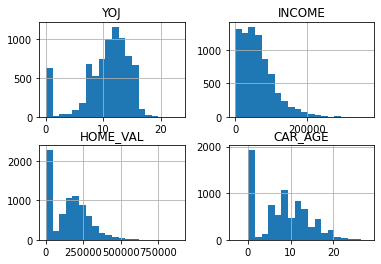

In [103]:
train_df[['YOJ','INCOME','HOME_VAL','CAR_AGE'].hist(bins=20)

In [104]:
# We replace the missing values of numeric variables with their mean

train_df['YOJ'].replace(np.nan, train_df['YOJ'].mean(), inplace=True)
train_df['INCOME'].replace(np.nan, train_df['INCOME'].mean(), inplace=True)
train_df['HOME_VAL'].replace(np.nan, train_df['HOME_VAL'].mean(), inplace=True)
train_df['CAR_AGE'].replace(np.nan, train_df['CAR_AGE'].mean(), inplace=True)

In [105]:
# We delete TARGET_AMT as it is not available in the test set.
# We delete INDEX as it is not useful in predicting TARGET FLAG
del train_df['TARGET_AMT']
del train_df['INDEX']

### Building and evaluating model

We first split the dataset into a training set and a validation set in order to evaluate our models.

In [106]:
from sklearn.model_selection import train_test_split

# We split the data
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('TARGET_FLAG', axis=1), train_df['TARGET_FLAG'], test_size=0.3, random_state=1)

We try the Random forest classifier, logistic regression and the XGBoost classifier.

There is an uneven class distribution: there are 6013 negative values for a total of 8161 values. Therefore, we use F1_score metric to evaluate the performance of our algorithm as it offers balance between precision and recall metric.

In [107]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()
Lr.fit(X_train, y_train)

LogisticRegression()

In [108]:
Lr_pred = Lr.predict_proba (X_test)


In [109]:
# We empirically chose a probability threshold that offers the better f1_score on validation set
print("Logistic regression score on validation set")
print( f1_score(y_test, Lr_pred[:,1]>0.3))


Logistic regression score on validation set
0.4496551724137931


In [110]:
from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier()
rdf.fit(X_train, y_train)

RandomForestClassifier()

In [111]:
from sklearn.metrics import f1_score

rdf_pred = rdf.predict(X_test)
print("Random forest score on validation set")
print( f1_score(y_test, rdf_pred))


Random forest score on validation set
0.48459958932238195


In [112]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train, y_train)

[22:00:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [113]:
xgb_pred = xgb.predict(X_test)
print("XGBoost on validation set")
print(f1_score(y_test, xgb_pred))


XGBoost on validation set
0.5190434012400355


XGBoost has the best F1_score among our models. We use this model to fill the test set.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

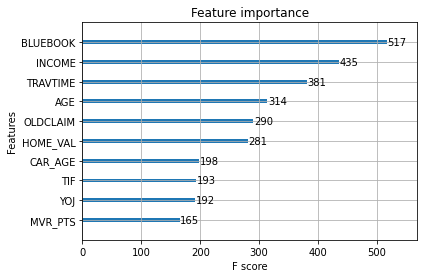

In [114]:
from xgboost import plot_importance
plot_importance(xgb, max_num_features=10)


### Cleaning the test  set

We first clean the test set using the same modification as for the train set.

In [115]:
columns = ['KIDSDRIV', 'HOMEKIDS', 'PARENT1', 'MSTATUS', 'SEX','RED_CAR','REVOKED', 'JOB', 'CAR_USE', 'CAR_TYPE', 'CLM_FREQ', 'URBANICITY']

for col in columns:
    for i in train_df_copy[col].unique():
        test_df[col+' ' + str(i)] = test_df[col].apply(lambda x:one_hot(x, i))
    del test_df[col]

values = train_df_copy['EDUCATION'].unique()
for val in values:
    if '<' in val:
        test_df['EDUCATION'+' before ' + val[1:]] = test_df['EDUCATION'].apply(lambda x:one_hot(x, val))
    else:
        test_df['EDUCATION'+' ' + val] = test_df['EDUCATION'].apply(lambda x:one_hot(x, val))
del test_df['EDUCATION']

test_df['INCOME'] = test_df['INCOME'].apply(reformat_money)
test_df['HOME_VAL'] = test_df['HOME_VAL'].apply(reformat_money)
test_df['BLUEBOOK'] = test_df['BLUEBOOK'].apply(reformat_money)
test_df['OLDCLAIM'] = test_df['OLDCLAIM'].apply(reformat_money)

test_df['YOJ'].replace(np.nan, test_df['YOJ'].mean(), inplace=True)
test_df['AGE'].replace(np.nan, test_df['AGE'].mean(), inplace=True)
test_df['INCOME'].replace(np.nan, test_df['INCOME'].mean(), inplace=True)
test_df['HOME_VAL'].replace(np.nan, test_df['HOME_VAL'].mean(), inplace=True)
test_df['CAR_AGE'].replace(np.nan, test_df['CAR_AGE'].mean(), inplace=True)

del test_df['TARGET_AMT']
del test_df['TARGET_FLAG']

### Predictions on test set

In [116]:
predictions = pd.DataFrame([], columns = ['INDEX', 'TARGET_FLAG'])
predictions['INDEX'] = test_df['INDEX']
del test_df['INDEX']

In [117]:
y_pred  = xgb.predict(test_df)
predictions ['TARGET_FLAG'] = y_pred

In [118]:
predictions

,INDEX,TARGET_FLAG
0,3,0
1,9,0
2,10,0
3,18,0
4,21,0
...,...,...
2136,10279,1
2137,10281,0
2138,10285,0
2139,10294,0


In [119]:
predictions.to_csv('predictions.csv')